In [56]:
from pprint import pprint
from numpy import array, zeros, diag, diagflat, dot

In [63]:
def cond_de_Parada(A, i):
    if i == 0: return 1
    else:
        x = []
        for j in range(len(A[i])): x.append(abs(A[i][j] - A[i-1][j]))
        G_k = max(x)
        Gr_k = G_k/max(A[i])
        return Gr_k

In [49]:


def M_jacobi(A,b,N,x):
                                                                                                                                                             
    if x is None:  # Cria um palpite inicial, se necessário
        x = zeros(len(A[0]))

                                                                                                                                                 
                                                                                                                                                                      
    D = diag(A) # Crie um vetor dos elementos diagonais de A  
    R = A - diagflat(D) # e subtrai-os de A    

                                                                                                                                                                            
    for i in range(N):# faz interações N vezes    
        x = (b - dot(R,x)) / D
    return x

a=np.array([[10,-1,2,0],[-1,11,-1,3],[2,-1,10,-1],[0,3,-1,8]])
b=np.array([6,25,-11,15])
c=array([0,0,0,0])



print( "A:")
print(a)

print ("b:")
print(b)

print ("x:")
print(M_jacobi(a,b,4,c))

A:
[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]
b:
[  6  25 -11  15]
x:
[ 1.01519876  1.95369576 -0.96810863  0.97384272]


In [79]:
#Método de GaussSeidel para o sistema

def metodoDeGaussSeidel(A,b,err):
    X = []
    x = []
    for i in range(A.shape[0]): x.append(0)
    X.append(x)
    
    k = 0
    
    while(cond_de_Parada(X,k) > err):
        y = []
        for i in range(A.shape[0]):
            E = 0
            for j in range(A.shape[0]):
                if i != j:
                    if j < len(y):
                        E = E + A[i][j]*y[j]
                    else:
                        E = E + A[i][j]*X[k][j]
            y.append((1/A[i][i])*(b[i][0] - E))
        X.append(y)
        k = k+1
    return X

A = np.array([[5,1,1],[3,4,1],[3,3,6]])
f = np.array([[5],[6],[0]])

X = metodoDeGaussSeidel(A,f,0.05)

for i in range(len(X)): print("Iteração {0}: {1}.".format(i, X[i]))

Iteração 0: [0, 0, 0].
Iteração 1: [1.0, 0.75, -0.875].
Iteração 2: [1.0250000000000001, 0.95, -0.9874999999999999].
Iteração 3: [1.0075, 0.99125, -0.9993749999999999].


Iteração 0: [0, 0].
Iteração 1: [3.0, 2.0].
Iteração 2: [1.0, 1.3333333333333333].
Iteração 3: [1.6666666666666667, 1.5555555555555556].
Iteração 4: [1.4444444444444444, 1.4814814814814814].


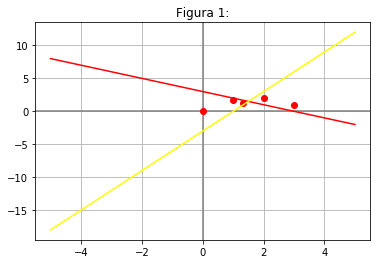

None


In [83]:
#grafico com as interção do Metodo Jacobi
#para o sistema 
# x1 + x2   =3
# x1 - 3*x2 =-3
import matplotlib.pyplot as plt

def interprete_jacobi(I):
    x = np.linspace(-2,2)
    y1 = 3 - x
    y2 = (1/3)*(3 + x)

plt.title("Figura 1:")
plt.axvline(x=0, color='gray')
plt.axhline(y=0, color='gray')
plt.grid(True)
plt.plot([0,3,2,1,4/3], [0,1,2,5/3,4/3], 'ro')
plt.plot(x, y1, color='red')
plt.plot(x, y2,color='yellow')
g=plt.show()
print(interprete_jacobi(g))

    

In [ ]:
a=np.array([[10,-1,2,0],[-1,11,-1,3],[2,-1,10,-1],[0,3,-1,8]])
b=np.array([6,25,-11,15])